In [66]:
import gym
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

env = gym.make('Breakout-v0')
env.reset()

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [4]:
# env.render()

True

In [67]:
print("Action Space {}".format(env.action_space))
print("State Space {}".format(env.observation_space))
print("Action Meaning {}".format(
env.unwrapped.get_action_meanings()))

Action Space Discrete(4)
State Space Box(210, 160, 3)
Action Meaning ['NOOP', 'FIRE', 'RIGHT', 'LEFT']


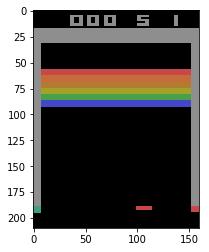

In [68]:
def show_image(board):    
    plt.imshow(board)
    plt.show()

def show_gray_image(board):
    plt.imshow(board, cmap = plt.get_cmap('gray'))
    plt.show()
    

show_image(env.reset())


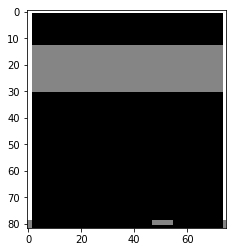

(82, 75)

In [69]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

def preprocess(image):
    # crop and downsample image
    new_image = image[31:195:2, 5:155:2]
    # change image colors
    new_image = rgb2gray(new_image)
    # walls should be 142 in rgb and points should be 74
    new_image[np.logical_and(new_image[:,:] != 0, new_image[:,:]!=142)] = 74
    
    return new_image

preprocessed = preprocess(env.reset())
show_gray_image(preprocessed)
np.shape(preprocessed)

In [64]:
%run Model.py

modelo = Model(env.unwrapped.get_action_meanings())
modelo.run()